In [2]:
import numpy as np
X = np.sort(5*np.random.rand(40,1),axis=0)
y = np.sin(X).ravel()

print(X[0:6],'\n\n',y[0:10])

[[0.07512762]
 [0.28087598]
 [0.46713822]
 [1.03876383]
 [1.08860686]
 [1.21159304]] 

 [0.07505697 0.27719741 0.45033296 0.86177779 0.88598175 0.93617719
 0.96739948 0.98909703 0.98883687 0.98798775]


In [3]:
#타깃 데이터에 노이즈 추가
y[::5] += 3 * (0.5 - np.random.rand(8))
print(y[0:10])

[0.09559016 0.27719741 0.45033296 0.86177779 0.88598175 0.2405751
 0.96739948 0.98909703 0.98883687 0.98798775]


In [4]:
from sklearn.svm import SVR 
svr_rbf = SVR(kernel='rbf',C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear',C=100, gamma='auto')
svr_poly = SVR(kernel='poly',C=100,gamma='auto',degree=3,epsilon=0.1, coef0=1)

svr_rbf.fit(X,y)
svr_lin.fit(X,y)
svr_poly.fit(X,y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [5]:
rbf_pred = svr_rbf.predict(X)
lin_pred = svr_lin.predict(X)
poly_pred = svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

preds = [rbf_pred,lin_pred, poly_pred]
kernel = ['Random_Forest','Linear','Polynomial']
evls = ['mse','rmse','mae']

results = pd.DataFrame(index = kernel, columns = evls)

for pred, nm in zip(preds,kernel):
    mse = mean_squared_error(y,pred)
    mae = mean_absolute_error(y,pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse,2)
    results.loc[nm]['rmse'] = round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)
    
results

,mse,rmse,mae
Random_Forest,0.1,0.32,0.17
Linear,0.32,0.57,0.35
Polynomial,0.11,0.33,0.16


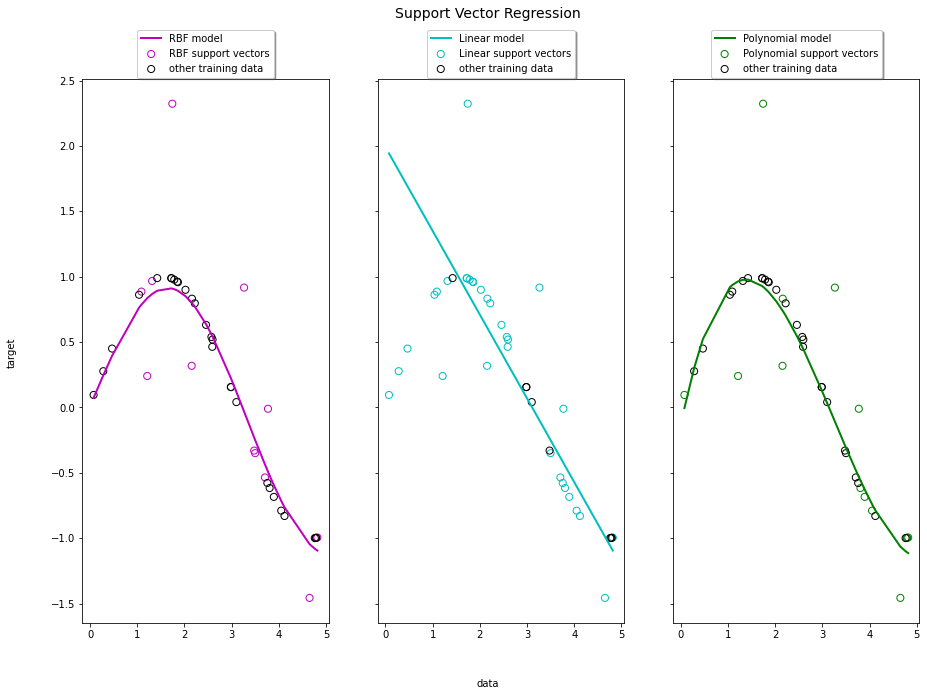

In [8]:
import matplotlib.pyplot as plt
lw = 2 

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF','Linear','Polynomial']
model_color = ['m','c','g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10), sharey = True)

for ix, svr in enumerate(svrs):
    axes[ix].plot(X,svr.fit(X,y).predict(X),
                  color = model_color[ix],
                  lw = lw,
                  label = "{} model".format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_],
                     y[svr.support_],
                     facecolor='none',
                     edgecolor = model_color[ix],
                     s=50,
                     label = "{} support vectors".format(kernel_label[ix]))
    
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)),svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)),svr.support_)],
                     facecolor='none',
                     edgecolor='k',
                     s=50,
                     label = 'other training data')
    axes[ix].legend(loc = 'upper center',
                    bbox_to_anchor = (0.5,1.1),
                    ncol=1,
                    fancybox=True,
                    shadow=True)
    
fig.text(0.5,0.04, 'data',ha = 'center',va = 'center') 
fig.text(0.06, 0.5,'target',ha = 'center',va = 'center',rotation = 'vertical')
fig.suptitle('Support Vector Regression',fontsize=14)  
plt.show()